In [1]:
import pandas as pd 
import numpy as np 
import os
import glob as gb
import matplotlib.pyplot as plt 
import cv2

In [3]:
## train data 
train_data = r'C:\Users\shiva\Desktop\EXCEED\Dataset\Bridge-Defect-CustomData\train'

## test data 
test_data =r'C:\Users\shiva\Desktop\EXCEED\Dataset\Bridge-Defect-CustomData\test'


In [5]:
train_images = []
train_labels = []
class_ = {'corrosion': 0, 'crack': 1, 'freelime': 2, 'leakage': 3, 'spalling': 4}

# open train data folder (os, glob)
for folder in os.listdir(train_data):
    folder_path = os.path.join(train_data, folder)
    
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")
        
        data = gb.glob(os.path.join(folder_path, '*.jpg'))
        print(f"Found {len(data)} images in folder {folder}")
        
        image_count = 0  # counter for processed images in this folder
        
        # read train images
        for img_path in data:
            image = cv2.imread(img_path)
            if image is not None:
                image_resized = cv2.resize(image, (100, 100))
                train_images.append(image_resized)
                train_labels.append(class_[folder.strip()])
                image_count += 1
            else:
                print(f"Warning: Could not read image {img_path}")
        
        print(f"Processed {image_count} images from folder {folder}")
    else:
        print(f"Skipping non-folder item: {folder}")

# Final output
print(f"Total images processed: {len(train_images)}")
print(f"Total labels assigned: {len(train_labels)}")

Processing folder:  corrosion
Found 437 images in folder  corrosion
Processed 437 images from folder  corrosion
Processing folder:  crack
Found 564 images in folder  crack
Processed 564 images from folder  crack
Processing folder:  freelime
Found 390 images in folder  freelime
Processed 390 images from folder  freelime
Processing folder:  leakage
Found 377 images in folder  leakage
Processed 377 images from folder  leakage
Processing folder:  spalling
Found 493 images in folder  spalling
Processed 493 images from folder  spalling
Total images processed: 2261
Total labels assigned: 2261


In [7]:
test_images = []
test_labels = []
class_ = {'corrosion': 0, 'crack': 1, 'freelime': 2, 'leakage': 3, 'spalling': 4}

# open train data folder (os, glob)
for folder in os.listdir(test_data):
    folder_path = os.path.join(test_data, folder)
    
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")
        
        data = gb.glob(os.path.join(folder_path, '*.jpg'))
        print(f"Found {len(data)} images in folder {folder}")
        
        image_count = 0  # counter for processed images in this folder
        
        # read train images
        for img_path in data:
            image = cv2.imread(img_path)
            if image is not None:
                image_resized = cv2.resize(image, (100, 100))
                test_images.append(image_resized)
                test_labels.append(class_[folder.strip()])
                image_count += 1
            else:
                print(f"Warning: Could not read image {img_path}")
        
        print(f"Processed {image_count} images from folder {folder}")
    else:
        print(f"Skipping non-folder item: {folder}")

# Final output
print(f"Total images processed: {len(test_images)}")
print(f"Total labels assigned: {len(test_labels)}")

Processing folder:  corrosion
Found 64 images in folder  corrosion
Processed 64 images from folder  corrosion
Processing folder:  crack
Found 71 images in folder  crack
Processed 71 images from folder  crack
Processing folder:  freelime
Found 57 images in folder  freelime
Processed 57 images from folder  freelime
Processing folder:  leakage
Found 45 images in folder  leakage
Processed 45 images from folder  leakage
Processing folder:  spalling
Found 87 images in folder  spalling
Processed 87 images from folder  spalling
Total images processed: 324
Total labels assigned: 324


In [8]:
def get_label(n) : 
    for x , y in class_.items() : 
        if n == y : 
            return x

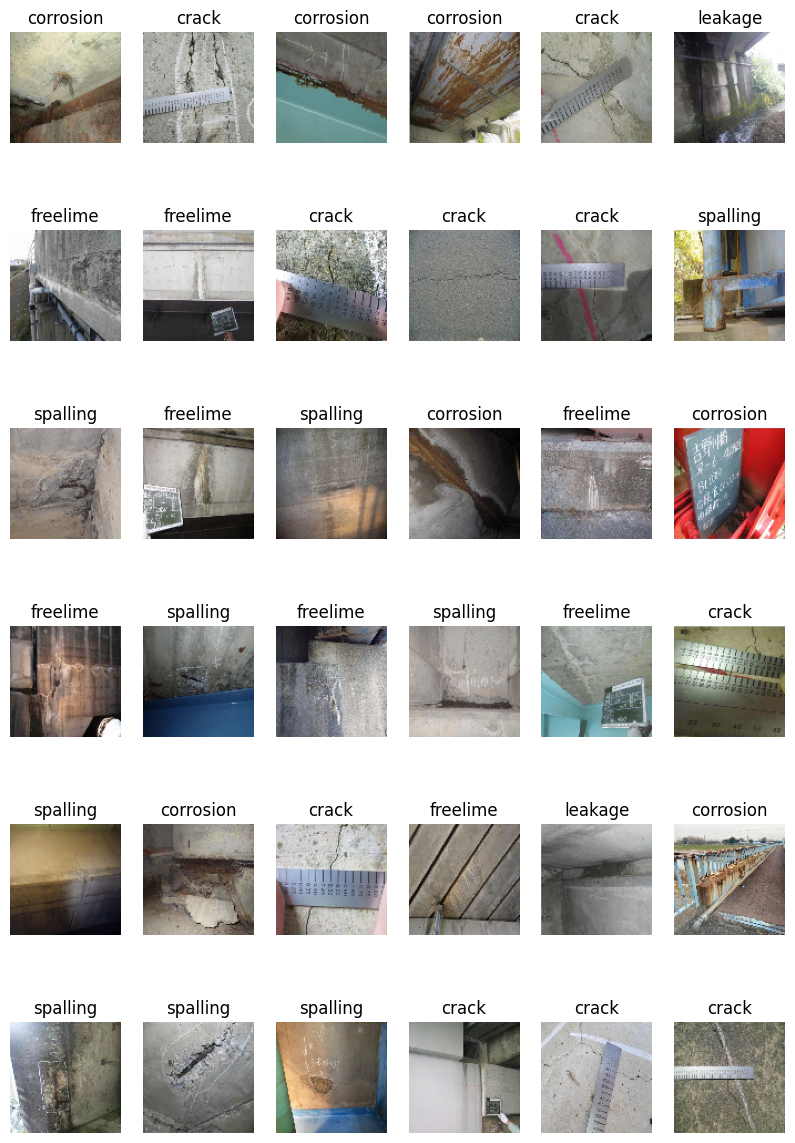

In [11]:
plt.figure(figsize=(10, 15))
for n, i in enumerate(np.random.randint(0, len(train_images), 36)):
    plt.subplot(6, 6, n+1)
    # Convert BGR to RGB if necessary
    img_rgb = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(get_label(train_labels[i]))

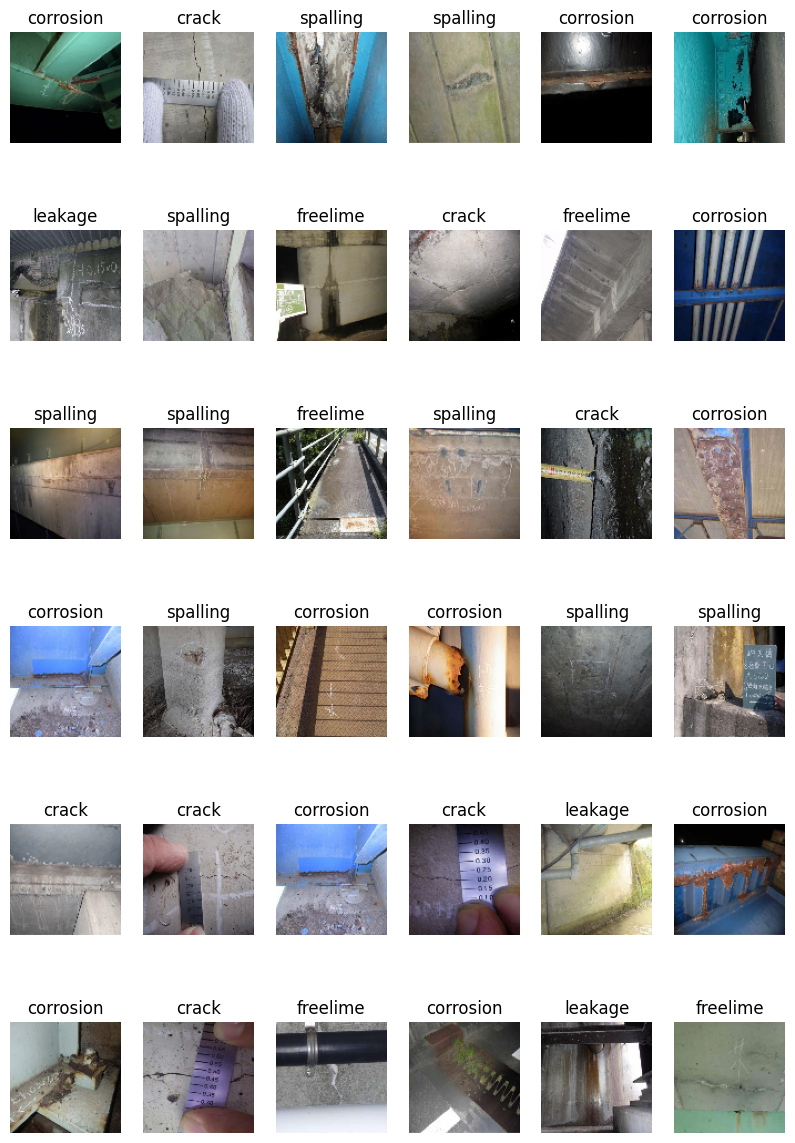

In [12]:
plt.figure(figsize=(10, 15))
for n, i in enumerate(np.random.randint(0, len(test_images), 36)):
    plt.subplot(6, 6, n+1)
    # Convert BGR to RGB if necessary
    img_rgb = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(get_label(test_labels[i]))
plt.show()

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import Dinov2ForImageClassification

c:\Users\shiva\anaconda3\envs\GPU\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [17]:
train_path = r'C:\Users\shiva\Desktop\EXCEED\Dataset\Bridge-Defect-CustomData\train'
test_path = r'C:\Users\shiva\Desktop\EXCEED\Dataset\Bridge-Defect-CustomData\test'

In [45]:
# Load datasets using ImageFolder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_data = ImageFolder(root=train_path, transform=train_transforms)
test_data = ImageFolder(root=test_path, transform=test_transforms)
num_labels = len(train_data.classes)
print("device", device)
print(f"Number of labels: {num_labels}")

# Data loaders
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False, num_workers=0)


model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-base", num_labels=num_labels)
model.to(device)

device cuda
Number of labels: 5


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Dinov2ForImageClassification(
  (dinov2): Dinov2Model(
    (embeddings): Dinov2Embeddings(
      (patch_embeddings): Dinov2PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Dinov2Encoder(
      (layer): ModuleList(
        (0-11): 12 x Dinov2Layer(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attention): Dinov2SdpaAttention(
            (attention): Dinov2SdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): Dinov2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)

In [46]:
# Freeze all layers in the DINOv2 model
for param in model.dinov2.parameters():
    param.requires_grad = False

# Unfreeze the classifier
for param in model.classifier.parameters():
    param.requires_grad = True

In [47]:
from torchinfo import summary
summary(model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                                Input Shape          Output Shape         Trainable
Dinov2ForImageClassification (Dinov2ForImageClassification)            [32, 3, 224, 224]    [32, 5]              Partial
├─Dinov2Model (dinov2)                                                 [32, 3, 224, 224]    [32, 768]            False
│    └─Dinov2Embeddings (embeddings)                                   [32, 3, 224, 224]    [32, 257, 768]       False
│    │    └─Dinov2PatchEmbeddings (patch_embeddings)                   [32, 3, 224, 224]    [32, 256, 768]       False
│    │    └─Dropout (dropout)                                          [32, 257, 768]       [32, 257, 768]       --
│    └─Dinov2Encoder (encoder)                                         [32, 257, 768]       [32, 257, 768]       False
│    │    └─ModuleList (layer)                                         --                   --                   False
│    └─LayerNorm (layernorm)                 

In [48]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [49]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Initialize metrics lists
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
test_latencies = []

# Move the model to the appropriate device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Use CrossEntropyLoss for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    running_corrects = 0
    total_samples = 0

    # Training phase
    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits  # Shape: (batch_size, num_classes)
        
        # Calculate loss
        loss = loss_fn(outputs, labels)  # Labels are class indices (not one-hot encoded)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        # Get predictions (class with the highest logit)
        preds = torch.argmax(outputs, dim=1)  # Shape: (batch_size)
        
        # Calculate accuracy
        running_corrects += (preds == labels).sum().item()
        total_samples += labels.size(0)

        # Print every 10 batches
        if batch_idx % 10 == 0:
            batch_accuracy = (preds == labels).float().mean()
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx}/{len(train_dataloader)}], "
                  f"Loss: {loss.item():.4f}, Batch Accuracy: {batch_accuracy:.4f}")

    # Calculate and store epoch-level metrics
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = running_corrects / total_samples
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Loss: {epoch_loss:.4f}, "
          f"Epoch Accuracy: {epoch_accuracy:.4f}")

    # Evaluation on test data
    model.eval()
    test_running_loss = 0
    test_running_corrects = 0
    test_total_samples = 0
    start_time = time.time()

    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits  # Shape: (batch_size, num_classes)
            
            # Calculate loss
            loss = loss_fn(outputs, labels)  # Labels are class indices

            test_running_loss += loss.item()
            
            # Get predictions (class with the highest logit)
            preds = torch.argmax(outputs, dim=1)  # Shape: (batch_size)
            
            # Calculate accuracy
            test_running_corrects += (preds == labels).sum().item()
            test_total_samples += labels.size(0)

    end_time = time.time()
    test_loss = test_running_loss / len(test_dataloader)
    test_accuracy = test_running_corrects / test_total_samples
    latency = end_time - start_time

    # Store test metrics
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    test_latencies.append(latency)

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Latency: {latency:.4f}s")

Epoch [1/10], Batch [0/71], Loss: 1.9944, Batch Accuracy: 0.2188
Epoch [1/10], Batch [10/71], Loss: 1.6461, Batch Accuracy: 0.2500
Epoch [1/10], Batch [20/71], Loss: 1.3612, Batch Accuracy: 0.4062
Epoch [1/10], Batch [30/71], Loss: 1.0975, Batch Accuracy: 0.5312
Epoch [1/10], Batch [40/71], Loss: 1.2761, Batch Accuracy: 0.5625
Epoch [1/10], Batch [50/71], Loss: 1.0798, Batch Accuracy: 0.5938
Epoch [1/10], Batch [60/71], Loss: 1.2119, Batch Accuracy: 0.4688
Epoch [1/10], Batch [70/71], Loss: 1.2625, Batch Accuracy: 0.5238
Epoch [1/10], Average Loss: 1.2668, Epoch Accuracy: 0.4878
Test Loss: 1.0121, Test Accuracy: 0.5772, Latency: 12.4418s
Epoch [2/10], Batch [0/71], Loss: 0.9912, Batch Accuracy: 0.6250
Epoch [2/10], Batch [10/71], Loss: 0.9438, Batch Accuracy: 0.5938
Epoch [2/10], Batch [20/71], Loss: 1.2422, Batch Accuracy: 0.5000
Epoch [2/10], Batch [30/71], Loss: 1.0168, Batch Accuracy: 0.5938
Epoch [2/10], Batch [40/71], Loss: 0.7860, Batch Accuracy: 0.6562
Epoch [2/10], Batch [50/7

In [50]:
def plot_loss(train_losses, test_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label="Training Loss", marker="o")
    plt.plot(test_losses, label="Test Loss", marker="o")
    plt.title("Training and Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

In [51]:
def plot_accuracy(train_accuracies, test_accuracies):
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label="Training Accuracy", marker="o")
    plt.plot(test_accuracies, label="Test Accuracy", marker="o")
    plt.title("Training and Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [52]:
def plot_latency(test_latencies):
    plt.figure(figsize=(10, 5))
    plt.plot(test_latencies, label="Test Latency", marker="o", color="red")
    plt.title("Test Latency per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Latency (seconds)")
    plt.legend()
    plt.grid(True)
    plt.show()

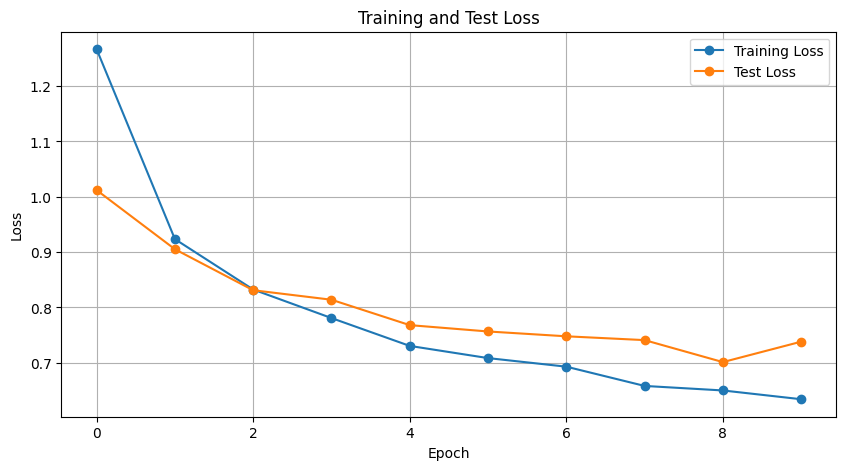

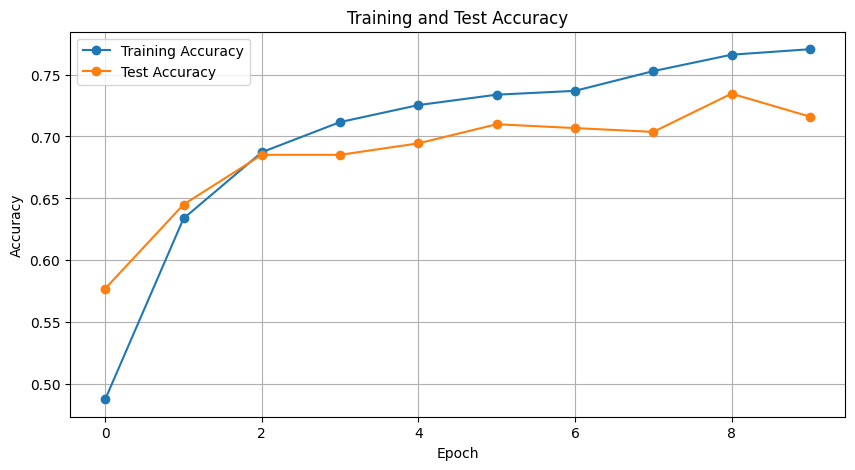

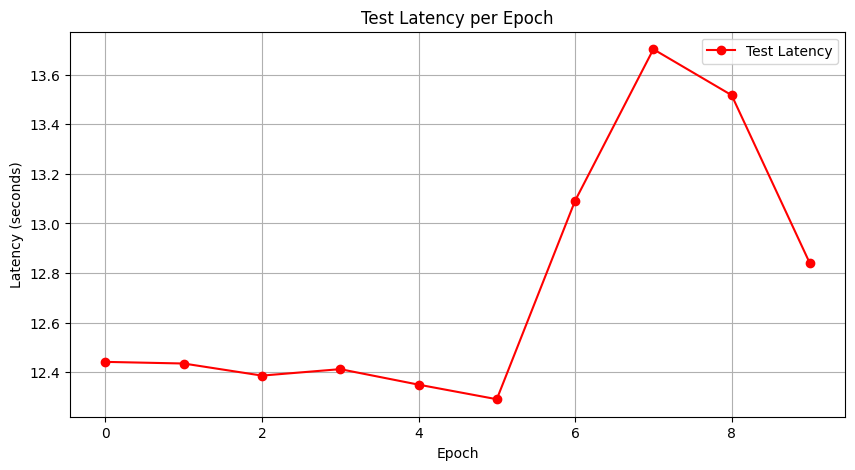

In [53]:

plot_loss(train_losses, test_losses)
plot_accuracy(train_accuracies, test_accuracies)
plot_latency(test_latencies)

In [54]:
torch.save(model.state_dict(), 'dinov2_backboned.pth')